In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

In [2]:
import os
from tqdm import tqdm

In [3]:
from fastai.vision import *
from fastai.metrics import error_rate

In [4]:
PATH = Path('../data/')

In [5]:
! ls {PATH}

download.sh  train-jpg	train_v2.csv


In [6]:
path_anno = PATH/'train_v2.csv'
path_img = PATH/'train-jpg'

In [7]:
np.random.seed(96)
pattern = r'/([^/]+)_\d+.jpg$'

In [8]:
fnames = get_image_files(path_img)
print(fnames[:5])

[PosixPath('../data/train-jpg/train_28549.jpg'), PosixPath('../data/train-jpg/train_38815.jpg'), PosixPath('../data/train-jpg/train_17332.jpg'), PosixPath('../data/train-jpg/train_13571.jpg'), PosixPath('../data/train-jpg/train_34226.jpg')]


In [13]:
import pandas as pd

In [14]:
df = pd.read_csv(path_anno)

In [16]:
df.head()

,image_name,tags
0,train_0,haze primary
1,train_1,agriculture clear primary water
2,train_2,clear primary
3,train_3,clear primary
4,train_4,agriculture clear habitation primary road


In [20]:
size=224
bs=64
src = (ImageItemList.from_csv(PATH, 'train_v2.csv', folder='train-jpg', suffix='.jpg')
       .random_split_by_pct(0.2)
       .label_from_df(label_delim=' '))
tfms = get_transforms(flip_vert=True, max_lighting=0.1, max_zoom=1.05, max_warp=0.)
data = (src.transform(tfms, size=128)
        .databunch().normalize(imagenet_stats))

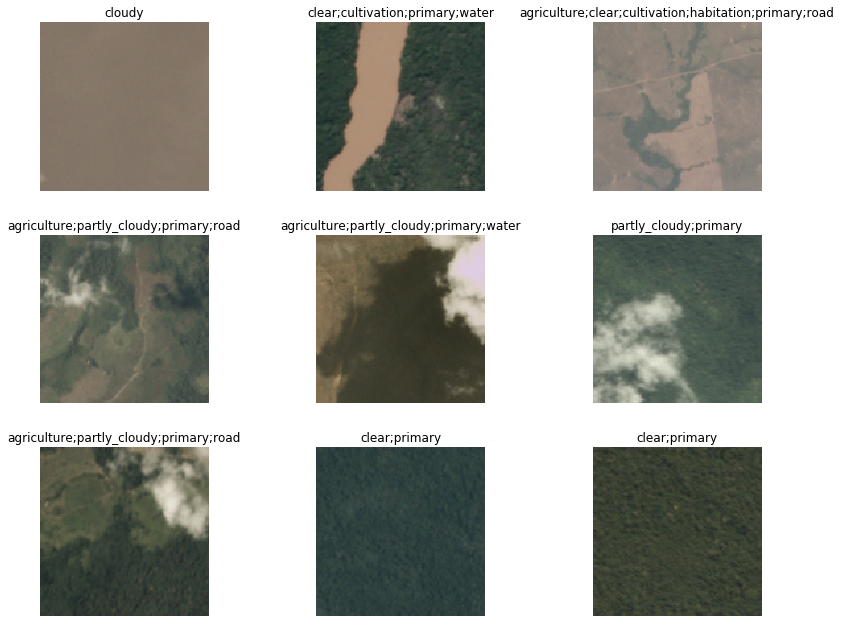

In [22]:
data.show_batch(rows=3, figsize=(12,9))